In [3]:
from google.colab import drive
drive.mount('/content/drive')
#x_train = np.load('/content/drive/My Drive/dlhw1p2/train.npy', allow_pickle=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#from google.colab import files
#df.to_csv('/content/drive/My Drive/dlhw1p2/ex.csv', index=False)
#files.download('/content/drive/My Drive/dlhw1p2/ex.csv')

In [2]:
import json
import requests

import os
import numpy as np
from PIL import Image

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import time

from PIL import Image
import requests
from io import BytesIO

import torchvision.models as models
import torchvision.transforms as transforms

from torch.autograd import Variable

# Install required libraries
#!pip install torch>=1.2.0 tensorboard future tqdm
#from torch.utils.tensorboard import SummaryWriter
#from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [3]:
url = 'https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5.1_train.json'
r = requests.get(url)

train_textVQA = r.json()
#print(r.json())

In [4]:
len(train_textVQA['data'])

34602

In [5]:
train_textVQA['data'][0]

{'answers': ['nokia',
  'nokia',
  'nokia',
  'nokia',
  'toshiba',
  'nokia',
  'nokia',
  'nokia',
  'nokia',
  'nokia'],
 'flickr_300k_url': 'https://c4.staticflickr.com/3/2891/9134076951_9db89d3e0f_z.jpg',
 'flickr_original_url': 'https://farm6.staticflickr.com/2891/9134076951_f65b421097_o.jpg',
 'image_classes': ['Belt',
  'Headphones',
  'Goggles',
  'Scale',
  'Bottle opener',
  'Mobile phone',
  'Mirror',
  'Digital clock',
  'Television',
  'Telephone',
  'Tool',
  'Wheel',
  'Camera',
  'Watch',
  'Glasses',
  'Aircraft'],
 'image_height': 730,
 'image_id': '0054c91397f2fe05',
 'image_width': 1024,
 'question': 'what is the brand of phone?',
 'question_id': 0,
 'question_tokens': ['what', 'is', 'the', 'brand', 'of', 'phone'],
 'set_name': 'train'}

In [ ]:
filename = 'https://farm6.staticflickr.com/2891/9134076951_f65b421097_o.jpg'
response = requests.get(filename)
img = Image.open(BytesIO(response.content))
img = transforms.ToTensor()(img)

In [ ]:
img.shape

torch.Size([3, 1459, 2048])

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.6.0', 'resnet152', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
###EXAMPLE FROM PYTORCH

# sample execution (requires torchvision)
response = requests.get(filename)
input_image = Image.open(BytesIO(response.content))

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output.shape)
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probs = (torch.nn.functional.softmax(output[0], dim=0))
print(np.argmax(probs))

NameError: ignored

In [ ]:
#https://github.com/facebookresearch/mmf/blob/master/tools/scripts/features/extract_resnet152_feat.py


In [ ]:
TARGET_IMAGE_SIZE = [448, 448]
CHANNEL_MEAN = [0.485, 0.456, 0.406]
CHANNEL_STD = [0.229, 0.224, 0.225]
data_transforms = transforms.Compose(
    [
        transforms.Resize(TARGET_IMAGE_SIZE),
        transforms.ToTensor(),
        transforms.Normalize(CHANNEL_MEAN, CHANNEL_STD),
    ]
)

use_cuda = torch.cuda.is_available()

# NOTE feat path "https://download.pytorch.org/models/resnet152-b121ed2d.pth"
RESNET152_MODEL = models.resnet152(pretrained=True)
RESNET152_MODEL.eval()

if use_cuda:
    RESNET152_MODEL = RESNET152_MODEL.cuda()


In [ ]:
class ResNet152FeatModule(nn.Module):
    def __init__(self):
        super().__init__()
        modules = list(RESNET152_MODEL.children())[:-2]
        self.feature_module = nn.Sequential(*modules)

    def forward(self, x):
        return self.feature_module(x)

In [ ]:
_resnet_module = ResNet152FeatModule()
if use_cuda:
    _resnet_module = _resnet_module.cuda()

In [ ]:
def extract_image_feat(img_file):
    #img = Image.open(img_file).convert("RGB")
    response = requests.get(img_file)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    img_transform = data_transforms(img)
    # make sure grey scale image is processed correctly
    if img_transform.shape[0] == 1:
        img_transform = img_transform.expand(3, -1, -1)
    img_var = Variable(img_transform.unsqueeze(0))
    if use_cuda:
        img_var = img_var.cuda()

    img_feat = _resnet_module(img_var)
    
    del img
    del img_transform
    del img_var
    
    return img_feat

In [ ]:
#feat = pool5_val.data.cpu().numpy()

In [ ]:
feat = extract_image_feat('https://farm6.staticflickr.com/2891/9134076951_f65b421097_o.jpg')

In [ ]:
feat.shape

torch.Size([1, 2048, 14, 14])

In [ ]:
#feat = feat.permute(0, 2, 3, 1).data.cpu().numpy()
feat = feat.data.cpu().numpy()

ACTUAL CODE !!!

In [ ]:
url = 'https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5.1_train.json'
r = requests.get(url)
train_textVQA = r.json()

In [ ]:
shuffled_data = train_textVQA['data']
np.random.shuffle(shuffled_data)
len(shuffled_data) == len(train_textVQA['data'])
#np.save("/content/drive/My Drive/Colab Notebooks/testvqa_train/order.npy", shuffled_data)

In [ ]:
#len(np.load("/content/drive/My Drive/Colab Notebooks/testvqa_train/order.npy", allow_pickle=True))

In [ ]:
class ResNet152FeatModule(nn.Module):
    def __init__(self):
        super().__init__()
        modules = list(RESNET152_MODEL.children())[:-1]
        self.feature_module = nn.Sequential(*modules)

    def forward(self, x):
        return self.feature_module(x)

In [ ]:
TARGET_IMAGE_SIZE = [448, 448]
CHANNEL_MEAN = [0.485, 0.456, 0.406]
CHANNEL_STD = [0.229, 0.224, 0.225]
data_transforms = transforms.Compose(
    [
        transforms.Resize(TARGET_IMAGE_SIZE),
        transforms.ToTensor(),
        transforms.Normalize(CHANNEL_MEAN, CHANNEL_STD),
    ]
)

use_cuda = torch.cuda.is_available()

# NOTE feat path "https://download.pytorch.org/models/resnet152-b121ed2d.pth"
RESNET152_MODEL = models.resnet152(pretrained=True)
RESNET152_MODEL.eval()

if use_cuda:
    RESNET152_MODEL = RESNET152_MODEL.cuda()

_resnet_module = ResNet152FeatModule()
if use_cuda:
    _resnet_module = _resnet_module.cuda()

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


In [ ]:
def extract_image_feat(img_file):
    img = Image.open(img_file).convert("RGB")
    img_transform = data_transforms(img)
    # make sure grey scale image is processed correctly
    if img_transform.shape[0] == 1:
        img_transform = img_transform.expand(3, -1, -1)
    img_var = Variable(img_transform.unsqueeze(0))
    if use_cuda:
        img_var = img_var.cuda()

    img_feat = _resnet_module(img_var)
    return img_feat

In [ ]:
embeddings = {}
embeddings_info = {}
no_response = set()

In [ ]:
def main():
  #embeddings = {}
 #len(train_textVQA['data'])
  for i in range(10000):
    if i % 1000 == 0: print(i)

    #datapoint = train_textVQA['data'][i]
    datapoint = shuffled_data[i]
    url = datapoint["flickr_300k_url"]
    classes = datapoint["image_classes"]
    
    try:
      response = requests.get(url)
      img_file = BytesIO(response.content)
      feat = extract_image_feat(img_file)
      feat = feat.data.cpu().numpy()

      embeddings[i] = feat
      embeddings_info[i] = (url, classes)

      #np.save("/content/drive/My Drive/Colab Notebooks/testvqa_train/resnet_pooled_embeddings/"+str(i)+".npy", feat)

      torch.cuda.empty_cache()
      del feat

    except:
      no_response.add((url, i))
      print("error for: " + url, "index: " + str(i))
      continue
    
    #return embeddings

In [ ]:
main()

0
error for: https://c2.staticflickr.com/9/8269/8707647467_1fbf20e6eb_z.jpg index: 27
error for: https://c7.staticflickr.com/5/4054/4261707598_f01173c92a_z.jpg index: 34
error for: https://c7.staticflickr.com/7/6034/5887450294_420b6e0152_z.jpg index: 43
error for: https://c1.staticflickr.com/4/3611/3364820076_2f0e2fcb3f_z.jpg?zz=1 index: 48
error for: https://c2.staticflickr.com/4/3055/2429246323_2314247d1b_z.jpg index: 50
error for: https://c6.staticflickr.com/9/8615/16801827055_005bd96c11_z.jpg index: 62
error for: https://c1.staticflickr.com/8/7053/6909441237_182368ac75_z.jpg index: 98
error for: https://c6.staticflickr.com/5/4123/4816031000_d3066f6e23_z.jpg index: 101
error for: https://c3.staticflickr.com/9/8168/7478481634_492fced40b_z.jpg index: 105
error for: https://c6.staticflickr.com/9/8321/8035087226_b3a98743cc_z.jpg index: 111
error for: https://c7.staticflickr.com/5/4098/4757972899_e3723c2e7a_z.jpg index: 114
error for: https://c1.staticflickr.com/5/4078/4816016702_9c15857

In [ ]:
len(embeddings)

9232

In [ ]:
len(no_response)

768

In [ ]:
embeddings[0].shape

(1, 2048, 1, 1)

In [ ]:
'''
try out urls that threw exceptions
url = train_textVQA['data'][21]
response = requests.get(url)
img_file = BytesIO(response.content)
feat = extract_image_feat(img_file)
feat = feat.data.cpu().numpy()
'''

"\ntry out urls that threw exceptions\nurl = train_textVQA['data'][21]\nresponse = requests.get(url)\nimg_file = BytesIO(response.content)\nfeat = extract_image_feat(img_file)\nfeat = feat.data.cpu().numpy()\n"

In [ ]:
data = {id: feat.flatten() for id, feat in embeddings.items()}

In [ ]:
df = pd.DataFrame.from_dict(data, orient='index')
df.shape

(9232, 2048)

In [ ]:
colnames = {i:"x"+str(i) for i in range(df.shape[1])}
df.rename(columns=colnames, inplace=True)

If already have embeddings or need to save...

In [7]:
#from google.colab import files
df.to_csv("/content/drive/My Drive/Colab Notebooks/testvqa_train_resnet152/embeddings.csv", index=True)
#files.download('/content/drive/My Drive/dlhw1p2/ex.csv')

NameError: ignored

In [4]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/testvqa_train_resnet152/embeddings.csv", index_col=0)

In [5]:
order_of_data = np.load("/content/drive/My Drive/Colab Notebooks/testvqa_train_resnet152/order.npy", allow_pickle=True)

In [6]:
indices = set(df.index)

In [7]:
embeddings_info = {i:(order_of_data[i]["flickr_300k_url"], order_of_data[i]["image_classes"]) for i in range(len(order_of_data)) if i in indices}

In [8]:
len(embeddings_info)

9232

In [9]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x2008,x2009,x2010,x2011,x2012,x2013,x2014,x2015,x2016,x2017,x2018,x2019,x2020,x2021,x2022,x2023,x2024,x2025,x2026,x2027,x2028,x2029,x2030,x2031,x2032,x2033,x2034,x2035,x2036,x2037,x2038,x2039,x2040,x2041,x2042,x2043,x2044,x2045,x2046,x2047
0,1.237066,0.321678,0.197909,0.159560,0.048286,0.407476,0.409350,0.807141,0.214843,0.152131,1.020863,0.976707,0.660484,0.450697,0.360196,0.005015,0.128113,0.363209,0.499478,0.162445,0.291210,0.210017,0.527285,0.384093,0.439621,0.566541,0.032462,0.430840,0.180934,0.363198,1.246843,0.069586,0.050274,0.122346,0.126718,0.899811,0.234212,0.140195,0.126836,0.285820,...,0.474994,0.351056,0.175491,0.933987,0.663991,0.469102,0.288191,0.705746,0.250961,0.211297,0.114368,0.063506,0.450209,0.310767,1.149438,1.282697,0.376761,0.602902,0.505447,0.059392,2.008612,0.477327,0.159863,0.536070,0.086730,0.374981,0.344942,0.536999,0.463072,0.216816,0.586199,0.319041,0.415520,0.051128,0.247305,0.455821,0.112490,0.336179,0.310611,0.330857
1,0.821705,0.135479,0.122251,0.384216,0.162532,0.297690,0.466431,0.998663,0.274969,0.135678,0.469793,0.588138,0.781585,0.373353,0.182220,0.020801,0.179189,0.581610,0.369537,0.288567,0.254313,0.676623,0.108148,0.086317,0.416474,0.675405,0.121763,0.262166,0.192339,0.322229,1.161065,0.122717,0.047991,0.083634,0.076582,1.681489,0.172679,0.116725,0.073333,0.227273,...,0.353770,0.203697,0.127902,0.601825,0.375134,0.321665,0.399361,0.614680,0.306954,0.212773,0.080000,0.094915,0.287785,0.580350,0.247281,0.056357,0.414646,0.319631,0.424957,0.103515,1.726001,0.362662,0.174343,0.407030,0.363539,0.786183,0.078145,0.395883,0.275094,0.162263,0.531826,0.315017,0.350182,0.088833,0.557422,2.081550,0.278406,0.098332,0.057095,0.189122
2,0.112404,0.699328,0.086914,0.356576,0.192515,0.319198,0.073121,0.980080,0.355185,0.127599,0.081715,0.675458,0.176775,0.149484,0.181557,0.190536,0.332144,0.060977,0.018949,0.108852,0.102447,0.612994,0.186415,0.471028,0.471381,0.780043,0.574742,0.699791,0.134813,0.195009,0.222086,0.373930,0.233425,0.054932,0.363847,0.086974,0.654548,0.207662,0.196758,0.089758,...,0.179639,0.088205,0.253689,0.107462,0.041277,0.334103,0.343053,0.377981,0.264191,0.244502,0.500276,0.186841,0.290738,0.402947,0.407559,0.071286,0.146344,0.187637,0.417462,0.313046,0.324888,0.444542,0.081117,0.841327,0.084465,0.670315,0.777704,0.112591,0.575801,0.201804,0.463689,0.258306,0.120835,0.373808,0.489607,1.141763,1.002958,0.203544,0.203200,0.102036
3,0.755253,0.148232,0.221907,0.134791,0.255441,0.154403,0.221735,1.037336,0.162976,0.022713,1.194740,0.985559,0.510433,0.174471,0.325667,0.153067,0.125258,0.283455,1.126053,0.205679,0.478293,0.182812,0.553867,0.058222,0.245772,1.043055,0.140308,0.373619,0.155141,0.313438,1.635636,0.162011,0.403380,0.189497,0.079318,0.587765,0.234915,0.196816,0.130321,0.089730,...,0.262919,0.595106,0.106506,0.518868,0.635055,0.486896,0.702077,0.803309,0.068120,0.150549,0.220875,0.122962,0.258370,0.228765,1.255009,1.319158,0.305575,0.225154,0.708079,0.106006,1.685407,0.450373,0.151106,0.249045,0.176462,0.662423,0.286588,0.308116,0.187198,0.084081,0.647601,0.754848,0.105214,0.137950,0.198083,0.431285,0.061622,0.483100,0.142097,0.302477
4,0.374290,0.723030,0.348269,0.249713,0.340189,0.825253,0.823138,0.936978,0.068416,0.178514,0.200087,1.054224,0.455591,0.561199,0.441955,0.138370,0.289303,0.132025,0.385659,0.197987,0.220926,0.066750,0.396265,0.506052,0.595225,0.482189,0.333153,0.564822,0.293287,0.468091,0.401035,0.357159,0.188851,0.735378,0.578258,0.473712,1.008650,0.297941,0.300065,0.231995,...,0.220361,0.460527,0.514969,0.485729,0.362403,0.685805,0.269096,0.530611,0.763977,0.291770,0.898667,0.125901,0.392647,0.987992,1.066993,0.532176,0.144799,0.125982,0.922964,1.338649,0.309019,0.232980,0.163490,1.222870,0.291582,0.650774,0.299891,0.155374,0.451256,0.787488,0.318881,0.159189,0.084050,0.168164,0.296274,1.284409,0.365980,0.

In [ ]:
#https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6 (clustering reference)

In [10]:
scaler = StandardScaler()
scaler.fit(df)
X_scale = scaler.transform(df)
df_scale = pd.DataFrame(X_scale, columns=df.columns)
df_scale.head(n=20)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x2008,x2009,x2010,x2011,x2012,x2013,x2014,x2015,x2016,x2017,x2018,x2019,x2020,x2021,x2022,x2023,x2024,x2025,x2026,x2027,x2028,x2029,x2030,x2031,x2032,x2033,x2034,x2035,x2036,x2037,x2038,x2039,x2040,x2041,x2042,x2043,x2044,x2045,x2046,x2047
0,1.168521,-0.108306,-0.713214,-0.727147,-0.954564,0.702958,-0.034320,0.953431,-0.556511,-0.249733,1.320855,2.589259,0.946706,1.066149,0.702519,-1.137369,-0.096314,0.403322,0.342925,-0.231134,0.123739,-0.500245,1.330393,0.848999,0.024323,0.617694,-1.282040,0.218197,-0.457210,0.278935,1.907396,-0.704528,-0.853555,-0.549906,-0.348933,0.444463,-0.089796,-0.484298,-0.515969,0.205813,...,2.075322,-0.177226,-0.421798,1.606186,0.959411,-0.370024,-0.108029,1.247857,-0.004744,-0.288821,-0.564963,-0.935241,1.409865,0.080819,2.691175,2.904564,0.548167,1.313965,0.162870,-0.886309,4.101048,0.668258,0.222246,0.417951,-0.685186,-0.134004,-0.251649,1.285467,1.090905,-0.546290,0.394120,-0.371390,0.558990,-0.805821,-0.491541,-0.763119,-0.879262,0.558319,1.312871,0.654349
1,0.393418,-0.793387,-0.976279,0.020533,0.018288,0.138785,0.133980,1.521089,-0.320277,-0.381070,-0.159675,1.086124,1.321519,0.619213,-0.450217,-1.012567,0.469591,1.446979,-0.094823,0.639926,-0.069899,1.177871,-0.872241,-0.701921,-0.028623,1.018575,-0.725206,-0.445680,-0.388461,0.080677,1.681633,-0.215799,-0.876945,-0.793545,-0.660821,2.002922,-0.394062,-0.614592,-0.978754,-0.130499,...,1.181776,-0.575995,-0.701535,0.530246,-0.039780,-0.680613,0.373784,0.886846,0.318958,-0.279602,-0.762697,-0.741272,0.365261,1.537049,-0.519362,-1.048159,0.731145,0.069065,-0.001925,-0.761780,3.363411,0.179666,0.383142,0.006497,0.729269,1.206018,-1.011480,0.595486,-0.023248,-0.667120,0.248435,-0.378083,0.227624,-0.679666,0.421192,1.486526,-0.508521,-0.708180,-0.872108,-0.243506
2,-0.930202,1.281184,-1.099145,-0.071458,0.273606,0.249310,-1.025671,1.466012,-0.005114,-0.445566,-1.202305,1.423912,-0.550403,-0.674415,-0.454513,0.329338,2.164255,-1.040928,-1.275894,-0.601279,-0.866913,0.949034,-0.460935,1.301789,0.096972,1.403895,2.099304,1.276750,-0.735218,-0.534974,-0.789705,2.094969,1.022206,-0.974191,1.126189,-1.176120,1.988669,-0.109757,0.088836,-0.920433,...,-0.101742,-0.888529,0.037873,-1.071097,-1.194629,-0.654410,0.129743,-0.051488,0.071736,-0.081377,1.655329,-0.173591,0.384250,0.578757,0.051024,-1.000040,-0.564702,-0.511011,-0.017270,-0.170417,-0.293600,0.528563,-0.652791,1.391282,-0.696764,0.828426,0.980844,-0.789652,1.759052,-0.579538,0.065872,-0.472412,-0.935522,0.273811,0.221599,0.186071,1.110495,-0.147942,0.387131,-0.795170
3,0.269413,-0.746463,-0.629773,-0.809583,0.809455,-0.597545,-0.587494,1.635715,-0.760291,-1.282830,1.788002,2.623499,0.482290,-0.530027,0.478878,0.033115,-0.127946,0.022208,2.453748,0.067462,1.105574,-0.598085,1.470088,-0.848253,-0.419094,2.372413,-0.609573,-0.007015,-0.612682,0.038133,2.930676,0.145638,2.762815,-0.127278,-0.643799,-0.177676,-0.086319,-0.169969,-0.485827,-0.920593,...,0.512113,0.483199,-0.827309,0.261531,0.859320,-0.332539,1.685751,1.634623,-1.061768,-0.668342,0.047818,-0.568069,0.176080,-0.362137,3.066876,3.022085,0.204353,-0.346135,0.577739,-0.754748,3.257457,0.553407,0.124931,-0.497246,-0.226669,0.802710,-0.417840,0.166355,-0.544207,-0.840285,0.558638,0.353503,-1.014743,-0.515327,-0.636411,-0.797072,-0.992927,1.340655,-0.139496,0.474565
4,-0.441499,1.368388,-0.190412,-0.427108,1.531120,2.849847,1.185709,1.338258,-1.131813,-0.039122,-0.884281,2.889122,0.312549,1.704687,1.232070,-0.083075,1.689597,-0.701418,-0.040511,0.014332,-0.245121,-1.015492,0.641862,1.484205,0.380257,0.307077,0.592894,0.745533,0.220032,0.786542,-0.318722,1.940697,0.565691,3.308353,2.459990,-0.405067,3.739626,0.391424,0.982418,-0.103375,...,0.198420,0.119015,1.573744,0.154187,-0.083818,0.086480,-0.190786,0.553574,2.961054,0.213922,3.947447,-0.549923,1.039661,3.739037,2.397778,0.485495,-0.57216

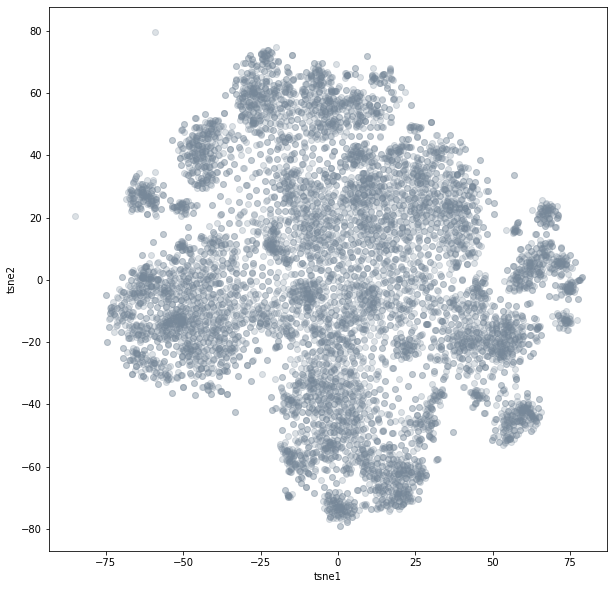

In [11]:
tsne = TSNE(n_components=2, perplexity=35)
tsne_scale_results = tsne.fit_transform(df_scale)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [17]:
sse = []
k_list = range(1, 25)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(df_scale) #not tsne data
    sse.append([k, km.inertia_])
    
results_scale = pd.DataFrame({'Cluster': range(1,25), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

KeyboardInterrupt: ignored

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


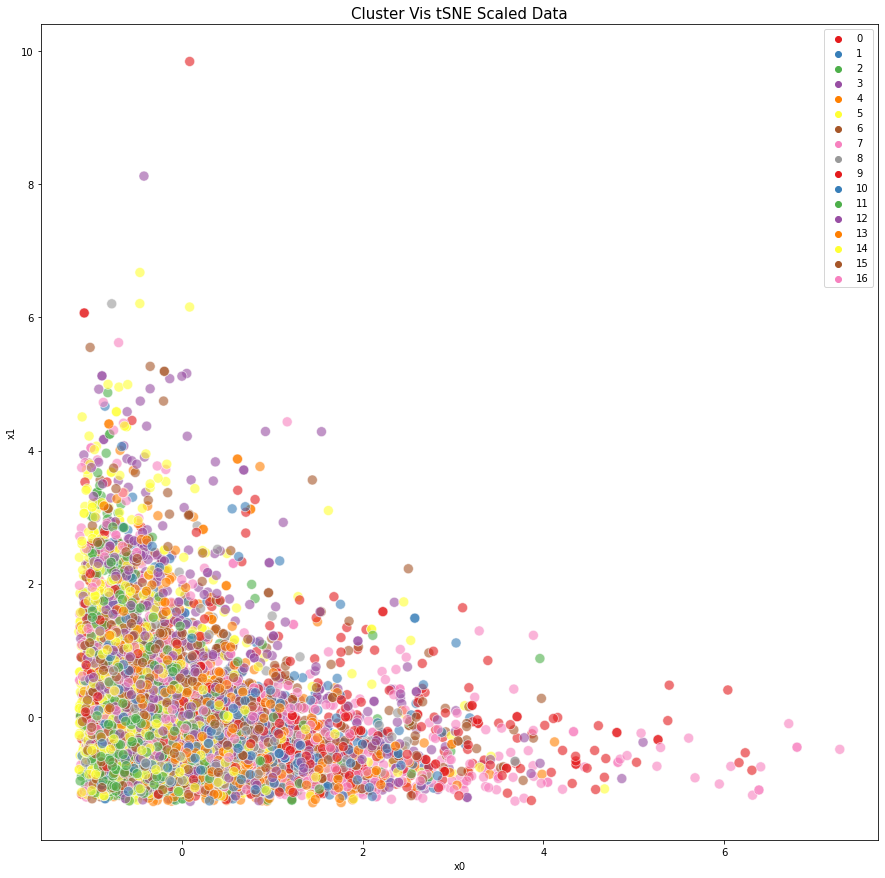

In [19]:
#change if not using tsne
kmeans_tsne_scale = KMeans(n_clusters=17, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale)
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

In [20]:
df_results = pd.DataFrame({'id': df.index, 'labels': kmeans_tsne_scale.labels_, 'class': [v[1] for v in embeddings_info.values()]})
df_results.set_index('id', inplace=True)
df_results.tail()

,labels,class
id,,
9995,13,[Mug]
9996,5,"[Laptop, Computer keyboard, Desk, Computer mon..."
9997,14,"[Vehicle registration plate, Poster]"
9998,11,[Mobile phone]
9999,7,"[Person, Clothing, Book]"


In [24]:
#df_results.to_csv("/content/drive/My Drive/Colab Notebooks/testvqa_train_resnet152/kmeans_results.csv", index=True)
#df_results.to_excel("/content/drive/My Drive/Colab Notebooks/testvqa_train_resnet152/kmeans_results.xlsx", index=True)

In [33]:
#observe each one
df_results[df_results['labels'] == 0].sample(n=20)

,labels,class
id,,
1339,0,[Poster]
767,0,[Stop sign]
4715,0,"[Tree, Vehicle, Car, Billboard]"
7604,0,[Billboard]
5531,0,"[Vehicle, Helicopter, Parachute, Aircraft]"
7941,0,"[Clock, Fashion accessory, Plant, Tree, Watch]"
1942,0,"[Traffic sign, Stop sign]"
6895,0,"[Tree, Vehicle, Car, Billboard]"
9179,0,[Telephone]


In [85]:
dataset = df_results[df_results['labels'] == 16]['class'].to_list()

In [ ]:
#http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

In [86]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
binary_mat = pd.DataFrame(te_ary, columns=te.columns_)
binary_mat

,Aircraft,Airplane,Animal,Auto part,Ball,Balloon,Bird,Boat,Bowling equipment,Boy,Building,Car,Clock,Clothing,Doll,Eagle,Fashion accessory,Flag,Flying disc,Football,Footwear,Furniture,Girl,Glasses,Goggles,Hat,Helicopter,Human face,Jeans,Land vehicle,Lighthouse,Man,Marine mammal,Mirror,Missile,Paddle,Person,Plant,Platter,Poster,Rocket,Sports equipment,Surfboard,Table,Taxi,Tire,Tower,Toy,Traffic sign,Train,Tree,Truck,Vehicle,Washing machine,Watercraft,Weapon,Whale,Wheel,Window,Woman
0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
218,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
219,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
220,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [87]:
apriori(binary_mat, min_support=0.1, use_colnames=True)

,support,itemsets
0,0.761261,(Aircraft)
1,0.900901,(Airplane)
2,0.126126,(Person)
3,0.941441,(Vehicle)
4,0.711712,"(Aircraft, Airplane)"
5,0.117117,"(Aircraft, Person)"
6,0.752252,"(Aircraft, Vehicle)"
7,0.103604,"(Person, Airplane)"
8,0.855856,"(Vehicle, Airplane)"
9,0.126126,"(Person, Vehicle)"


In [88]:
#how many unique 'classes' there are in training dataset

KeyError: ignored